<a href="https://colab.research.google.com/github/NikoKaramitos/MLProjects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by Niko Karamitos.

# Convolutional Neural Network


## 1. Import libraries

### 1.1 Import torch, torchvision, torchvision.transforms, torch.utils.data and torch.nn

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.nn as nn

## 2. Data Preparation

### 2.1 Image Transformation

In [ ]:
transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.GaussianBlur(kernel_size=(3,3), sigma=(0.1, 2.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])


### 2.2 Prepare train and test set by loading CIFAR10 dataset from torchvision.datasets.

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 48264267.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 2.3 Use torch.utils.data.random_split() to make a validation set from the training set with 80:20 split.


In [ ]:
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = data.random_split(trainset, [train_size, val_size])

### 2.4 Prepare three dataloaders for train, validation and test set. Use an appropriate batchsize of your choice.

In [ ]:
# TODO: set a batch size
batch_size = 64

# TODO: write dataloader for train set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle = True, num_workers=2)

# TODO: write dataloader for test set
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle = True, num_workers=2)

# TODO: write dataloader for validation set
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle = True, num_workers=2)


### 2.5 Load a random batch of images from the training set using the trainloader. Then use *make_grid()*  from *torchvision.utils* and *imshow()* from *matplotlib.pyplot* to show the images. Also, print the corresponding true labels for those image samples.

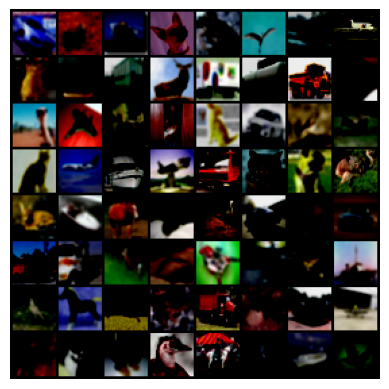

True Labels:
  car  frog  ship   dog  frog  bird   cat plane   cat horse truck  deer truck truck truck   dog  bird plane  deer   cat   cat   car  bird  deer   cat plane  ship plane truck   cat   dog  bird  deer  ship horse   dog  bird   car  deer   car truck truck  deer   dog  bird   cat  frog  ship  bird horse  deer  frog truck   cat truck plane  deer   cat   dog  bird horse  bird  ship  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# TODO: load a random batch of test set images
dataiter = iter(trainloader)
images, labels = next(iter(trainloader))

# TODO: show the images
img_grid = torchvision.utils.make_grid(images)
imp_np = np.transpose(img_grid.numpy(), (1, 2, 0))
plt.imshow(imp_np)
plt.axis('off')
plt.show()

# TODO: print the ground truth class labels for these images
print('True Labels:')
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


## 3. Model Design

### 3.1 Define a neural network model: (2+7+7 =16pts)
- Name the model class with your first name
- In the following sequential order, the model should consist:

    (1) a 2D convolution layer with 6 filters, dimension of each filter is (5, 5), stride=1, no zero padding
    
    (2) a Max Pool layer with filter size (2, 2), stride=2
    
    (3) a 2D convolution layer with 16 filters, dimension of each filter is (5, 5), stride=1, no zero padding

    (4) a 2D Max Pool layer with filter size (2, 2), stride=2
    
    ~ a flatten layer ~

    (5) a Dense/Fully-connected layer with 120 neurons
    
    ~ a ReLU activation ~
    
    ~ a Dropout Layer ~

    (6) a Dense/Fully-connected layer with 80 neurons
    
    ~ a ReLU activation ~

    (7) a Dense/Fully-connected layer with 10 neurons


In [ ]:
class Niko(nn.Module):
    def __init__(self):
        # TODO: Initialize the layers
        super(Niko, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)


    def forward(self, x):
        # TODO: Define the dataflow through the layers
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, start_dim=1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

### 3.2 Create an instance of the model class that you just prepared.

In [ ]:
model = Niko()

### 3.3 Set up Cross Entropy Loss as the loss function and *Adam* as the optimizer. Use a learning rate of your choice for the optimizer.


In [ ]:
import torch.optim as optim


# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## 4. Training and Validation


### 4.1 Write a training loop to load data, compute model output, compute loss and backpropagating it to update model parameters.

In [ ]:
# TODO: Define number of epochs
num_epochs = 10

# TODO: Initialize empty lists to store training loss, training accuracy, validation loss, validation accuracy
# You will use these lists to plot the loss history.
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# TODO: Loop through the number of epochs
for epoch in range(num_epochs):
    # TODO: set model to train mode
    model.train()

    # TODO: iterate over the training data in batches
    for i, (images, labels) in enumerate(trainloader):

        # TODO: get the image inputs and labels from current batch
        optimizer.zero_grad()

        # TODO: set the optimizer gradients to zero to avoid accumulation of gradients
        outputs = model(images)

        # TODO: compute the output of the model
        loss = criterion(outputs, labels)

        # TODO: compute the loss on current batch
        loss.backward()

        # TODO: backpropagate the loss
        optimizer.step()

        # TODO: update the optimizer parameters
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0)

        # TODO: update the train loss and accuracy
        train_losses.append(loss.item())
        train_accs.append(accuracy)

    # TODO: compute the average training loss and accuracy and store in respective arrays
    avg_train_loss = sum(train_losses[-len(trainloader):]) / len(trainloader)
    avg_train_acc = sum(train_accs[-len(trainloader):]) / len(trainloader)

    # TODO: set the model to evaluation mode
    model.eval()

    # TODO: keeping the gradient computation turned off, loop over batches of data from validation set.
    with torch.no_grad():
      for images, labels in valloader:
            # TODO: compute output of the model
            outputs = model(images)

            # TODO: compute the loss
            loss = criterion(outputs, labels)

            # TODO: compute the validation loss and accuracy
            val_losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            accuracy = correct / labels.size(0)
            val_accs.append(accuracy)

    # TODO: compute the average validation loss and accuracy and store in respective lists
    avg_val_loss = sum(val_losses[-len(valloader):]) / len(valloader)
    avg_val_acc = sum(val_accs[-len(valloader):]) / len(valloader)

    # TODO: print the training loss, training accuracy, validation loss and validation accuracy at the end of each epoch
    print(f"Epoch {epoch+1} / {num_epochs} - Training Loss: {avg_train_loss:.4f} - Training Acc: {avg_train_acc:.4f} - Val Loss: {avg_val_loss:.4f} - Val Acc: {avg_val_acc:.4f}")


    # TODO: save the model parameters once in every 5 epochs
    if (epoch+1) % 5 == 0:
      torch.save(model.state_dict(), f"model_epoch_{epoch+1}.pt")


Epoch 1 / 10 - Training Loss: 1.2797 - Training Acc: 0.5458 - Val Loss: 1.2318 - Val Acc: 0.5630
Epoch 2 / 10 - Training Loss: 1.2703 - Training Acc: 0.5473 - Val Loss: 1.2122 - Val Acc: 0.5711
Epoch 3 / 10 - Training Loss: 1.2632 - Training Acc: 0.5479 - Val Loss: 1.2288 - Val Acc: 0.5636
Epoch 4 / 10 - Training Loss: 1.2542 - Training Acc: 0.5530 - Val Loss: 1.1939 - Val Acc: 0.5728
Epoch 5 / 10 - Training Loss: 1.2476 - Training Acc: 0.5560 - Val Loss: 1.1948 - Val Acc: 0.5709
Epoch 6 / 10 - Training Loss: 1.2404 - Training Acc: 0.5626 - Val Loss: 1.1647 - Val Acc: 0.5924
Epoch 7 / 10 - Training Loss: 1.2319 - Training Acc: 0.5627 - Val Loss: 1.1813 - Val Acc: 0.5793
Epoch 8 / 10 - Training Loss: 1.2277 - Training Acc: 0.5618 - Val Loss: 1.2071 - Val Acc: 0.5724
Epoch 9 / 10 - Training Loss: 1.2175 - Training Acc: 0.5678 - Val Loss: 1.1688 - Val Acc: 0.5855
Epoch 10 / 10 - Training Loss: 1.2156 - Training Acc: 0.5676 - Val Loss: 1.1557 - Val Acc: 0.5919


### 4.2 Plot and compare
1. training and validation loss over the number of epochs
2. training and validation accuracy over the number of epochs

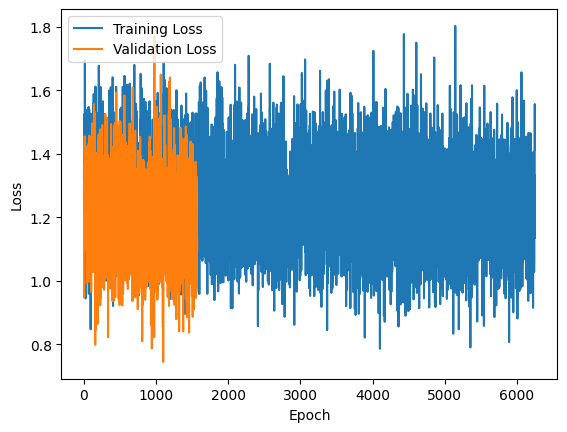

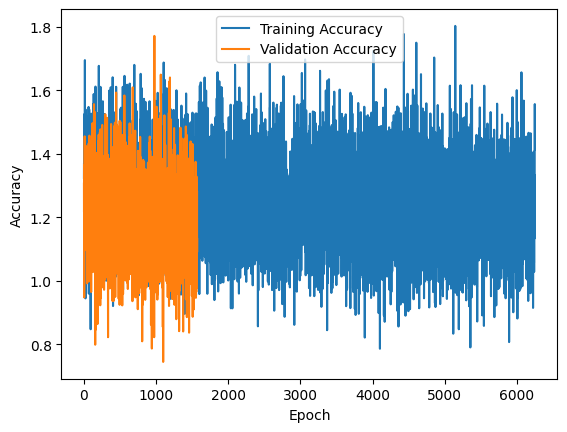

In [ ]:
# TODO: plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# TODO: plot the training and validation accuracy
plt.plot(train_losses, label='Training Accuracy')
plt.plot(val_losses, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## 5. Testing on new data

### 5.1 Load the best performing model (one with good validation accuracy and without overfitting) among the ones you saved.

In [ ]:
# TODO: instantiate a model
model = Niko()

# TODO: load parameters from one of the saved model states
model.load_state_dict(torch.load('model_epoch_10.pt'))

# TODO: set this model to evaluation mode
model.eval()


Niko(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

### 5.2 Take a random batch of images from test set and show the images. Print the corresponding ground truth class labels. Then compute model output (model selected at previous step) and the predicted labels for the images in this batch.

This is similar to task #2.5 with additional task on computing model output and printing predicted labels.

Files already downloaded and verified


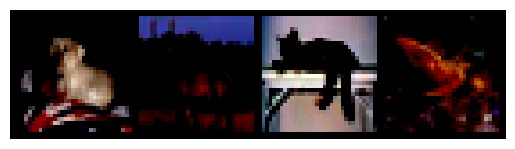

True Labels:
  dog  deer   cat  frog
Predicted Labels:
  cat horse horse  frog


In [ ]:
import torchvision.datasets as datasets

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

# TODO: load a random batch of test set images
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True)
images, labels = next(iter(test_loader))

# TODO: show the images
img_grid = torchvision.utils.make_grid(images)
imp_np = np.transpose(img_grid.numpy(), (1, 2, 0))
plt.imshow(imp_np)
plt.axis('off')
plt.show()

# TODO: print the ground truth class labels for these images
print('True Labels:')
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# TODO: compute model output
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# TODO: print the predicted class labels for these images
print('Predicted Labels:')
print(' '.join('%5s' % classes[predicted[j]] for j in range(4)))

### 5.3 Compute the average accuracy on test data using this model.
Loop over the test set, compute accuracy on each batch, lastly print the average accuracy.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to keep track of total correct and total samples
total_correct = 0
total_samples = 0

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Loop over the test set and compute accuracy on each batch
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total_samples += labels.size(0)
    total_correct += (predicted == labels).sum().item()

# Compute the average accuracy
avg_accuracy = 100 * total_correct / total_samples

# Print the average accuracy
print("Average accuracy on test set: {:.2f}%".format(avg_accuracy))

Average accuracy on test set: 59.86%


### 5.4 Compute the average accuracy for each individual class.

In [ ]:
class_correct = {i: 0 for i in range(10)}
class_total = {i: 0 for i in range(10)}

# Loop over the test set and compute accuracy on each batch
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).squeeze()

    # Compute per-class accuracy for each batch
    for i in range(labels.size(0)):
        label = labels[i].item()
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Print per-class accuracy for 10 output classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 79 %
Accuracy of  bird : 39 %
Accuracy of   cat : 42 %
Accuracy of  deer : 48 %
Accuracy of   dog : 42 %
Accuracy of  frog : 73 %
Accuracy of horse : 66 %
Accuracy of  ship : 66 %
Accuracy of truck : 67 %
